## Anshika Subodh Singh
# Task 4 : Exploratory Data Analysis - Terrorism


In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing Data
df=pd.read_csv("Global_Terrorism.csv", encoding="ISO-8859–1")

c:\users\anshika\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Checking out first five rows of the data
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#Checking out total number of rows and columns
df.shape

(181691, 135)

In [5]:
#Checking out names of the columns
df.columns.values


array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

## Data Cleaning
As you can see above when we used head() , not all the column values are visible. In order to figure out the contents of the columns, we need to display all values. Thus, execute the following code.

In [6]:
#In order to display all the columns for better observation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
#Checking First 5 rows of the data
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [8]:
#Checking last 5 rows of the data
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0

Data has 135 columns. Most of them are more than 90% null and they also do not serve any value to the hypothesis we are trying to check out and draw insights about. Thus, dropping all unnecessary columns.

In [9]:
df.drop(['approxdate','resolution', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt','targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'guncertain1', 'guncertain2',
       'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed',
       'claimmode', 'claimmode_txt', 'claim2', 'claimmode2',
       'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt',
       'compclaim','weaptype2', 'weaptype2_txt', 'weapsubtype2',
       'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3',
       'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4',
       'weapsubtype4_txt', 'weapdetail','nkillter', 'nwoundte', 'ishostkid',
       'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert',
       'kidhijcountry', 'ransomamt', 'ransomamtus',
       'ransompaid', 'ransompaidus', 'ransomnote', 'hostkidoutcome',
       'hostkidoutcome_txt', 'nreleased', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY','related','property', 'propextent',
       'propextent_txt', 'propvalue', 'propcomment'],axis=1,inplace=True)

In [10]:
#Rechecking the rows of data with leftout column values
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,gname,motive,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillus,nwound,nwoundus,ransom,addnotes,scite1,scite2,scite3,dbsource
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,1,Assassination,14,Private Citizens & Property,58.0,Dominican Republic,MANO-D,NaN,13,Unknown,NaN,NaN,1.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,PGIS
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),21.0,Belgium,23rd of September Communist League,NaN,13,Unknown,NaN,NaN,0.0,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,PGIS
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,1,Assassination,10,Journalists & Media,217.0,United States,Unknown,NaN,13,Unknown,NaN,NaN,1.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,PGIS
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,3,Bombing/Explosion,7,Government (Diplomatic),217.0,United States,Unknown,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,PGIS
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),217.0,United States,Unknown,NaN,8,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,PGIS


In [11]:
#Rechecking the number of rows and colummns
df.shape

(181691, 37)

In [12]:
#Short description regarding spread of the data
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,success,suicide,attacktype1,targtype1,natlty1,weaptype1,weapsubtype1,nkill,nkillus,nwound,nwoundus,ransom
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000,180132.000000,181691.000000,160923.000000,171378.000000,117245.000000,165380.000000,116989.000000,77381.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,0.889598,0.036507,3.247547,8.439719,127.686441,6.447325,11.117162,2.403272,0.045981,3.167668,0.038944,-0.145811
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.313391,0.187549,1.915772,6.653838,89.299120,2.173435,6.495612,11.545741,5.681854,35.949392,3.057361,1.207861
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,0.000000,2.000000,3.000000,83.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,0.000000,3.000000,4.000000,101.000000,6.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,0.000000,3.000000,14.000000,173.000000,6.000000,16.000000,2.000000,0.000000,2.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,1.000000,1.000000,9.000000,22.000000,1004.000000,13.000000,31.000000,1570.000000,1360.000000,8191.000000,751.000000,1.000000


There are still a lot of missing values in the data despite dropping out blank columns. So we fill these values.

In [13]:
#df=df.replace(np.nan,'Unknown')
df=df.fillna(0)

In [14]:
#checkin the data types of all the attributes
df.dtypes

eventid               int64
iyear                 int64
imonth                int64
iday                  int64
extended              int64
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targtype1_txt        object
natlty1             float64
natlty1_txt          object
gname                object
motive               object
weaptype1             int64
weaptype1_txt        object
weapsubtype1        float64
weapsubtype1_txt     object
nkill               float64
nkillus             float64
nwound              float64
nwoundus            float64
ransom              float64
addnotes             object
scite1               object
scite2               object
scite3              

## Type Conversion
We check the data type of the variables. Sometimes the  variable are not in the data type in which they are required to be used. In many cases, the data type of the variable is not clear and are classified by default into object datatype. Some varibles might also be defined in the data type which takes up much more space than the variable really requires.

In this step we visually check these factors and perform type conversion.

In [15]:
#float64 to int64
df['weapsubtype1']=df['weapsubtype1'].astype('int64')
df['ransom']=df['ransom'].astype('int64')
df['nkill']=df['nkill'].astype('int64')
df['nkillus']=df['nkillus'].astype('int64')
df['nwound']=df['nwound'].astype('int64')
df['nwoundus']=df['nwoundus'].astype('int64')

In [16]:
#int64 to category
df['eventid']=df['eventid'].astype('category')
df['extended']=df['extended'].astype('category')
df['country']=df['country'].astype('category')
df['region']=df['region'].astype('category')
#df['success']=df['success'].astype('category')
df['suicide']=df['suicide'].astype('category')
df['attacktype1']=df['attacktype1'].astype('category')
df['targtype1']=df['targtype1'].astype('category')
df['weaptype1']=df['weaptype1'].astype('category')
df['weapsubtype1']=df['weapsubtype1'].astype('category')
#df['ransom']=df['ransom'].astype('category')

In [17]:
#object to category
df['country_txt']=df['country_txt'].astype('category')
df['region_txt']=df['region_txt'].astype('category')
df['provstate']=df['provstate'].astype('category')
df['city']=df['city'].astype('category')
df['attacktype1_txt']=df['attacktype1_txt'].astype('category')
df['targtype1_txt']=df['targtype1_txt'].astype('category')
df['weaptype1_txt']=df['weaptype1_txt'].astype('category')
df['weapsubtype1_txt']=df['weapsubtype1_txt'].astype('category')

In [18]:
#Rechecking the data types
df.dtypes

eventid             category
iyear                  int64
imonth                 int64
iday                   int64
extended            category
country             category
country_txt         category
region              category
region_txt          category
provstate           category
city                category
latitude             float64
longitude            float64
success                int64
suicide             category
attacktype1         category
attacktype1_txt     category
targtype1           category
targtype1_txt       category
natlty1              float64
natlty1_txt           object
gname                 object
motive                object
weaptype1           category
weaptype1_txt       category
weapsubtype1        category
weapsubtype1_txt    category
nkill                  int64
nkillus                int64
nwound                 int64
nwoundus               int64
ransom                 int64
addnotes              object
scite1                object
scite2        

In [19]:
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,natlty1,natlty1_txt,gname,motive,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nkillus,nwound,nwoundus,ransom,addnotes,scite1,scite2,scite3,dbsource
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,18.456792,-69.951164,1,0,1,Assassination,14,Private Citizens & Property,58.0,Dominican Republic,MANO-D,0,13,Unknown,0,0,1,0,0,0,0,0,0,0,0,PGIS
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),21.0,Belgium,23rd of September Communist League,0,13,Unknown,0,0,0,0,0,0,1,0,0,0,0,PGIS
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,1,Assassination,10,Journalists & Media,217.0,United States,Unknown,0,13,Unknown,0,0,1,0,0,0,0,0,0,0,0,PGIS
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,3,Bombing/Explosion,7,Government (Diplomatic),217.0,United States,Unknown,0,6,Explosives,16,Unknown Explosive Type,0,0,0,0,0,0,0,0,0,PGIS
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),217.0,United States,Unknown,0,8,Incendiary,0,0,0,0,0,0,0,0,0,0,0,PGIS


In [20]:
df.describe()

,iyear,imonth,iday,latitude,longitude,success,natlty1,nkill,nkillus,nwound,nwoundus,ransom
count,181691.000000,181691.000000,181691.000000,181691.000000,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,22.909109,-4.471911e+02,0.889598,126.590827,2.266860,0.029671,2.883291,0.025076,-0.062100
std,13.259430,3.388303,8.814045,18.699442,2.021946e+05,0.313391,89.691717,11.227057,4.564308,34.309746,2.453378,0.791544
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,1991.000000,4.000000,8.000000,9.518645,1.231572e+00,1.000000,83.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.126646,4.314357e+01,1.000000,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.538560,6.835734e+01,1.000000,168.000000,2.000000,0.000000,2.000000,0.000000,0.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1004.000000,1570.000000,1360.000000,8191.000000,751.000000,1.000000


In [21]:
#Checking presence of null values
df.isnull().sum()

eventid             0
iyear               0
imonth              0
iday                0
extended            0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
latitude            0
longitude           0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
natlty1             0
natlty1_txt         0
gname               0
motive              0
weaptype1           0
weaptype1_txt       0
weapsubtype1        0
weapsubtype1_txt    0
nkill               0
nkillus             0
nwound              0
nwoundus            0
ransom              0
addnotes            0
scite1              0
scite2              0
scite3              0
dbsource            0
dtype: int64

##  Data Visualization

I've performed univariant and bivariant analysis. In bivariant analysis, there are either numerical-numeriacal type or categorical-numerical type. Categorical-categorical type are not been performed.

### Insights Aimed to be drawn:
- Insight1: Are the number of successful attacks increasing over the years?
- Insight2: Are the number of kills increasing or decreasing over the years? Directly trying to find out if the violence of attacks increasing?
- Insight3: Which is the mode of attack used most widely over the years?
- Insight4: Which mode of attack leads to most successful attacks over the years?
- Insight5: Which mode of attack leads to most most number of casualties and thus to be considered more dangerous and violent?
- Insight6: Which mode of weapons used lead to most successful attacks over the years?
- Insight7: Which mode of weapons used lead to most most number of casualties and thus to be considered more dangerous and violent?
- Insight8: People of which nation are targetted the most?
- Insight9: Which Professional personel are targetted the most?
- Insight10: Which terrorist group has lead most number of attacks?
- Insight11: Ratio of successful suicide attacks?
- Insight12: Does suicide attacks lead to more number of casualties?

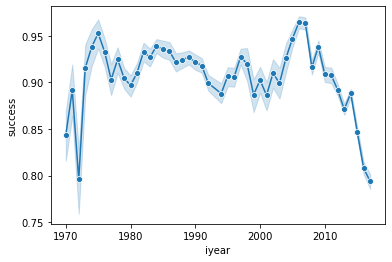

In [22]:
#Checking out succefull attacks over the years
ax=sns.lineplot(x='iyear',y='success',marker='o',data=df)

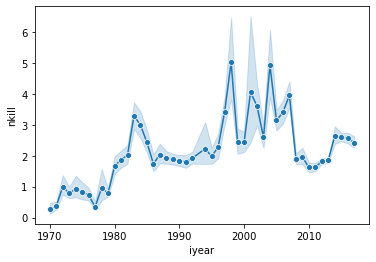

In [23]:
#Checking out number of kills over the years
sns.lineplot(x='iyear',y='nkill',marker='o',data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

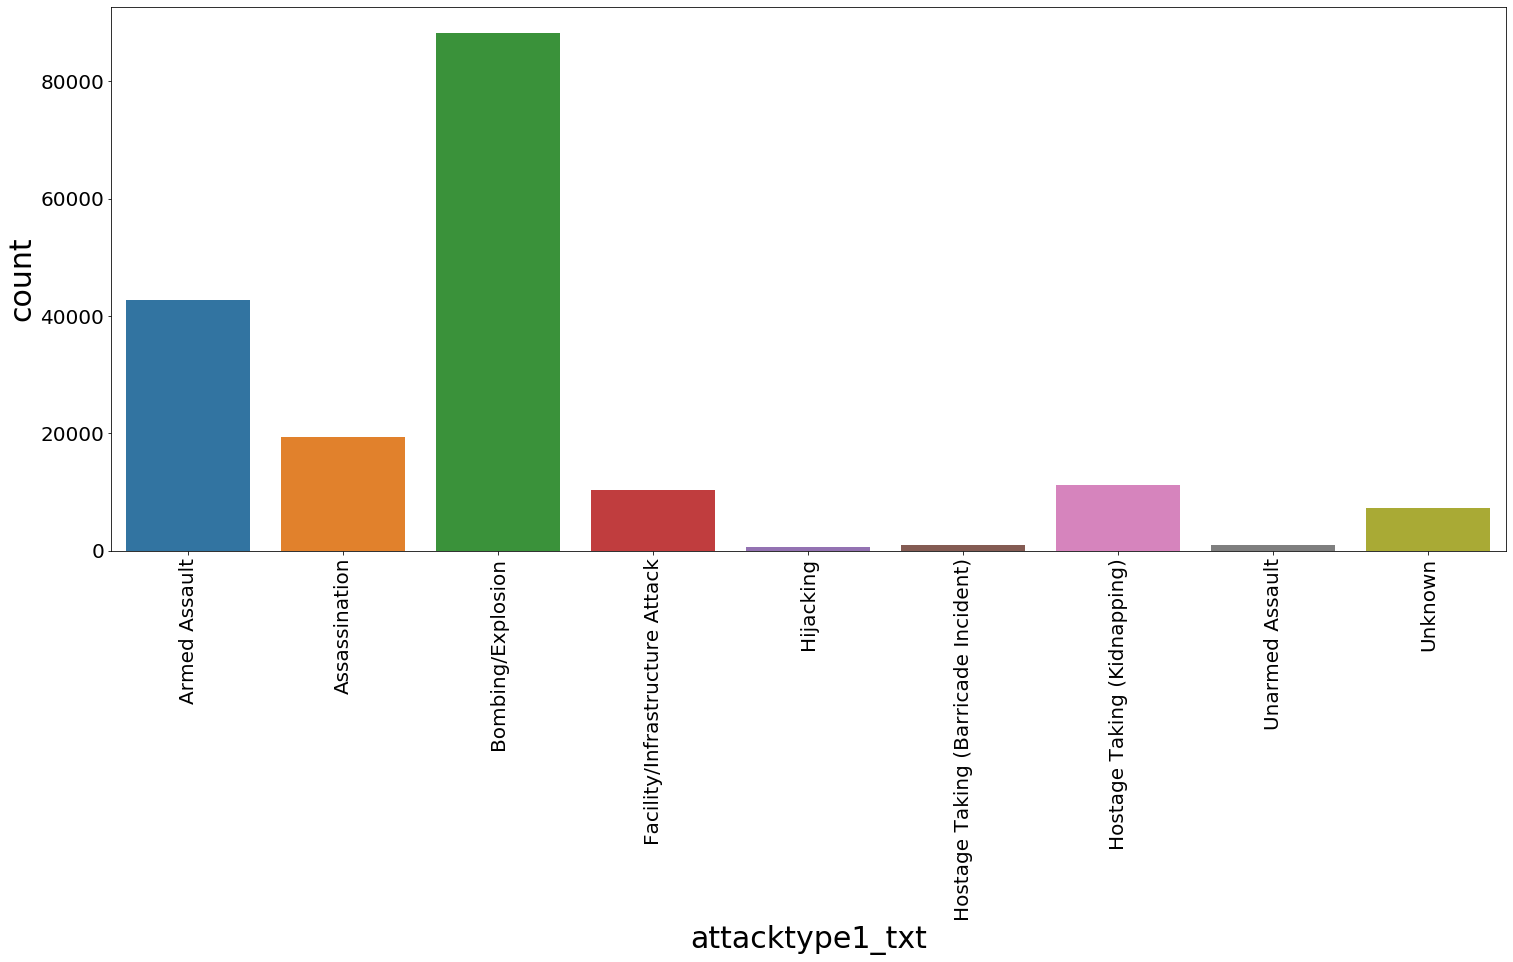

In [36]:
#Checking out Total number of each type of attacks over the years
plt.figure(figsize=(25,10))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
a=sns.countplot(x='attacktype1_txt',data=df)
a.set_xlabel(a.get_xlabel(),fontsize=30)
a.set_ylabel(a.get_ylabel(),fontsize=30)
plt.xticks(rotation=90)

Text(0, 0.5, 'count')

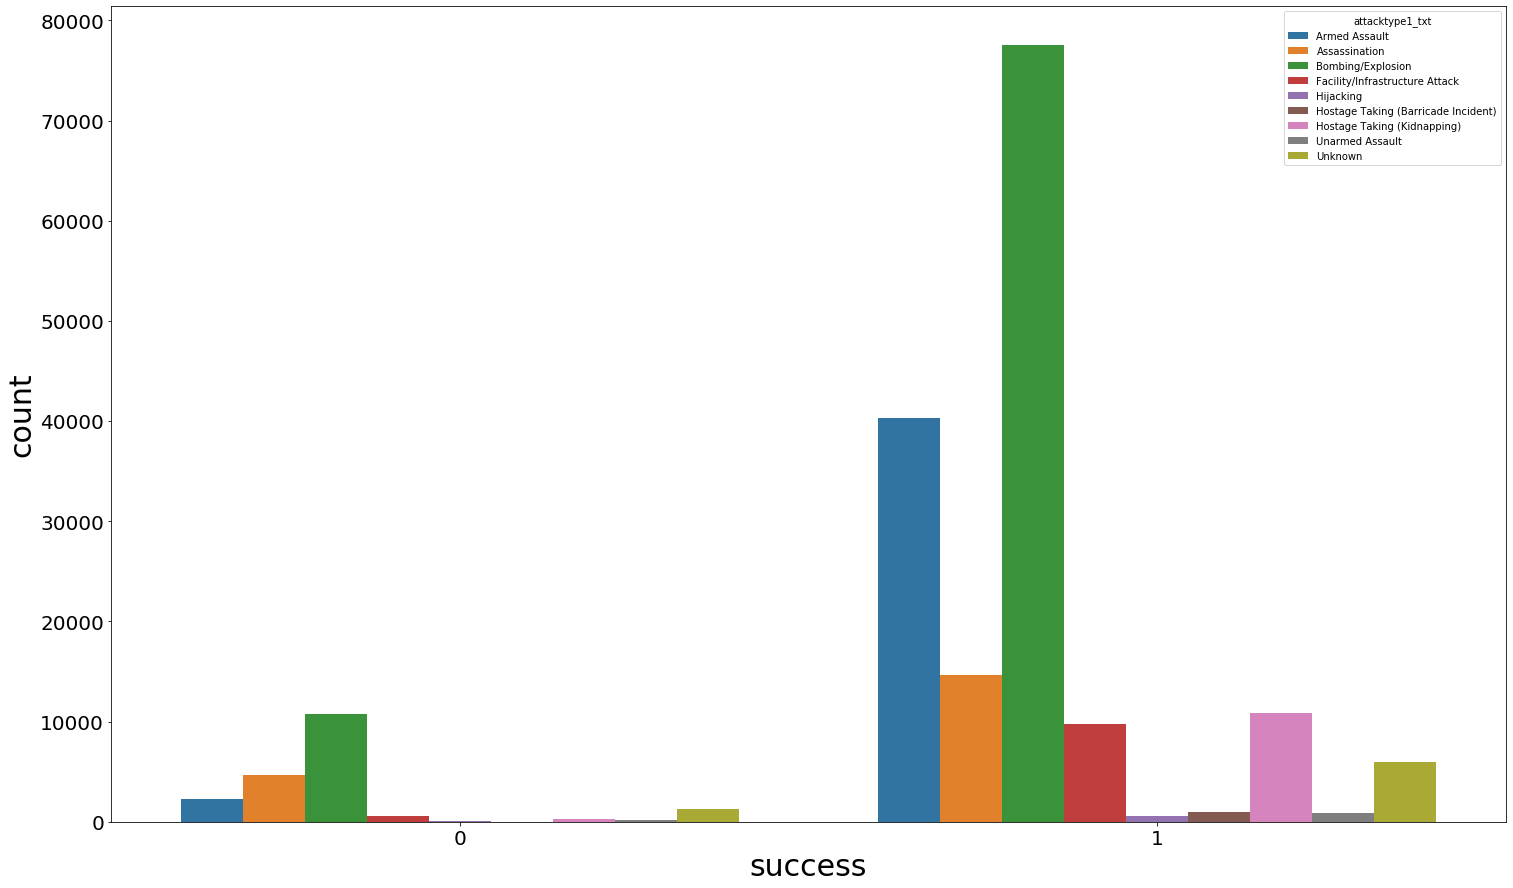

In [25]:
#Checking out the ratio of total successful attacks depending upon the type of attack
plt.figure(figsize=(25,15))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
b=sns.countplot(x='success',hue='attacktype1_txt', data=df)
b.set_xlabel(b.get_xlabel(),fontsize=30)
b.set_ylabel(b.get_ylabel(),fontsize=30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

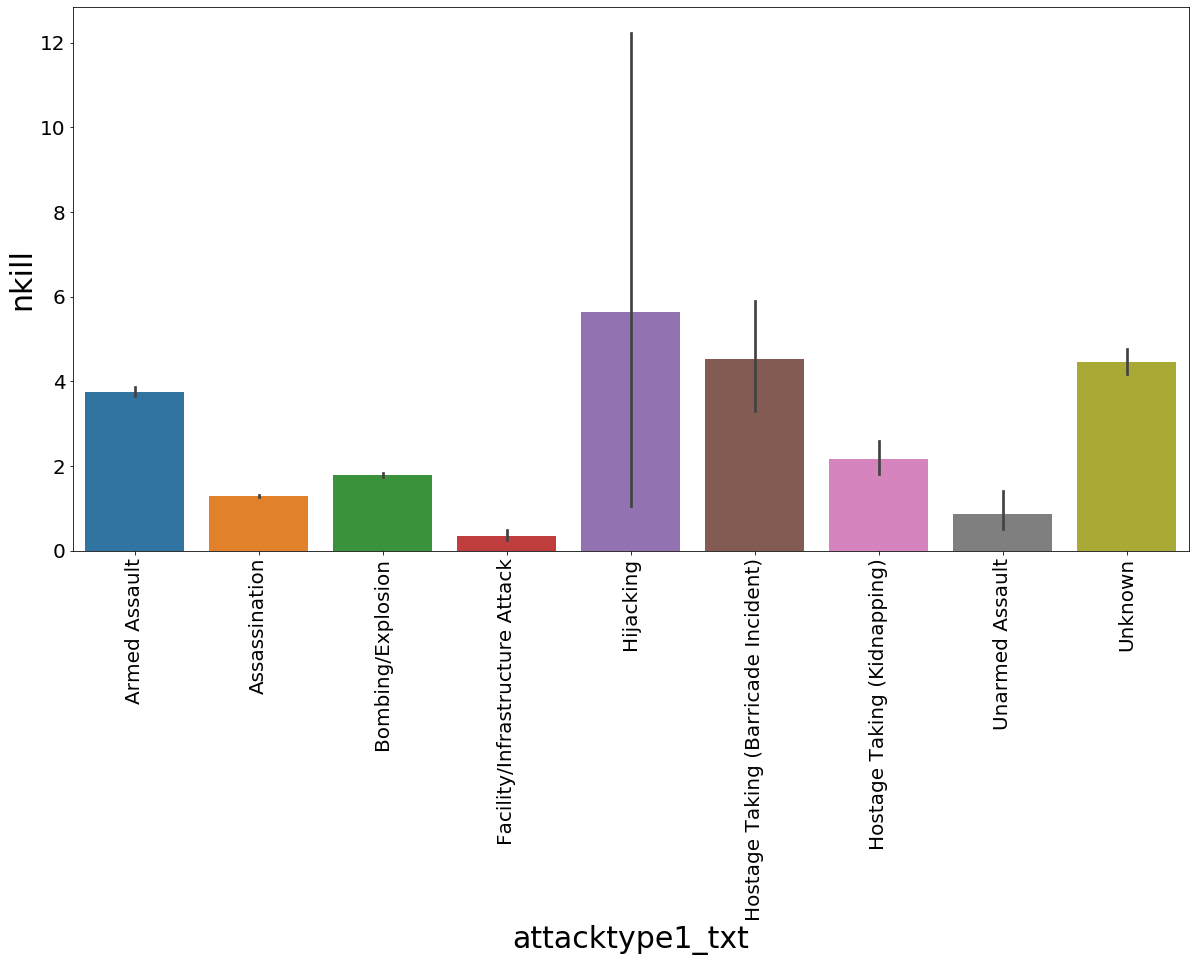

In [31]:
#To find out the type of attacks that lead to the maximum number of deaths/murder
plt.figure(figsize=(20,10))
c=sns.barplot(x='attacktype1_txt',y='nkill',data=df)
c.set_xlabel(c.get_xlabel(),fontsize=30)
c.set_ylabel(c.get_ylabel(),fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=90)

Text(0, 0.5, 'count')

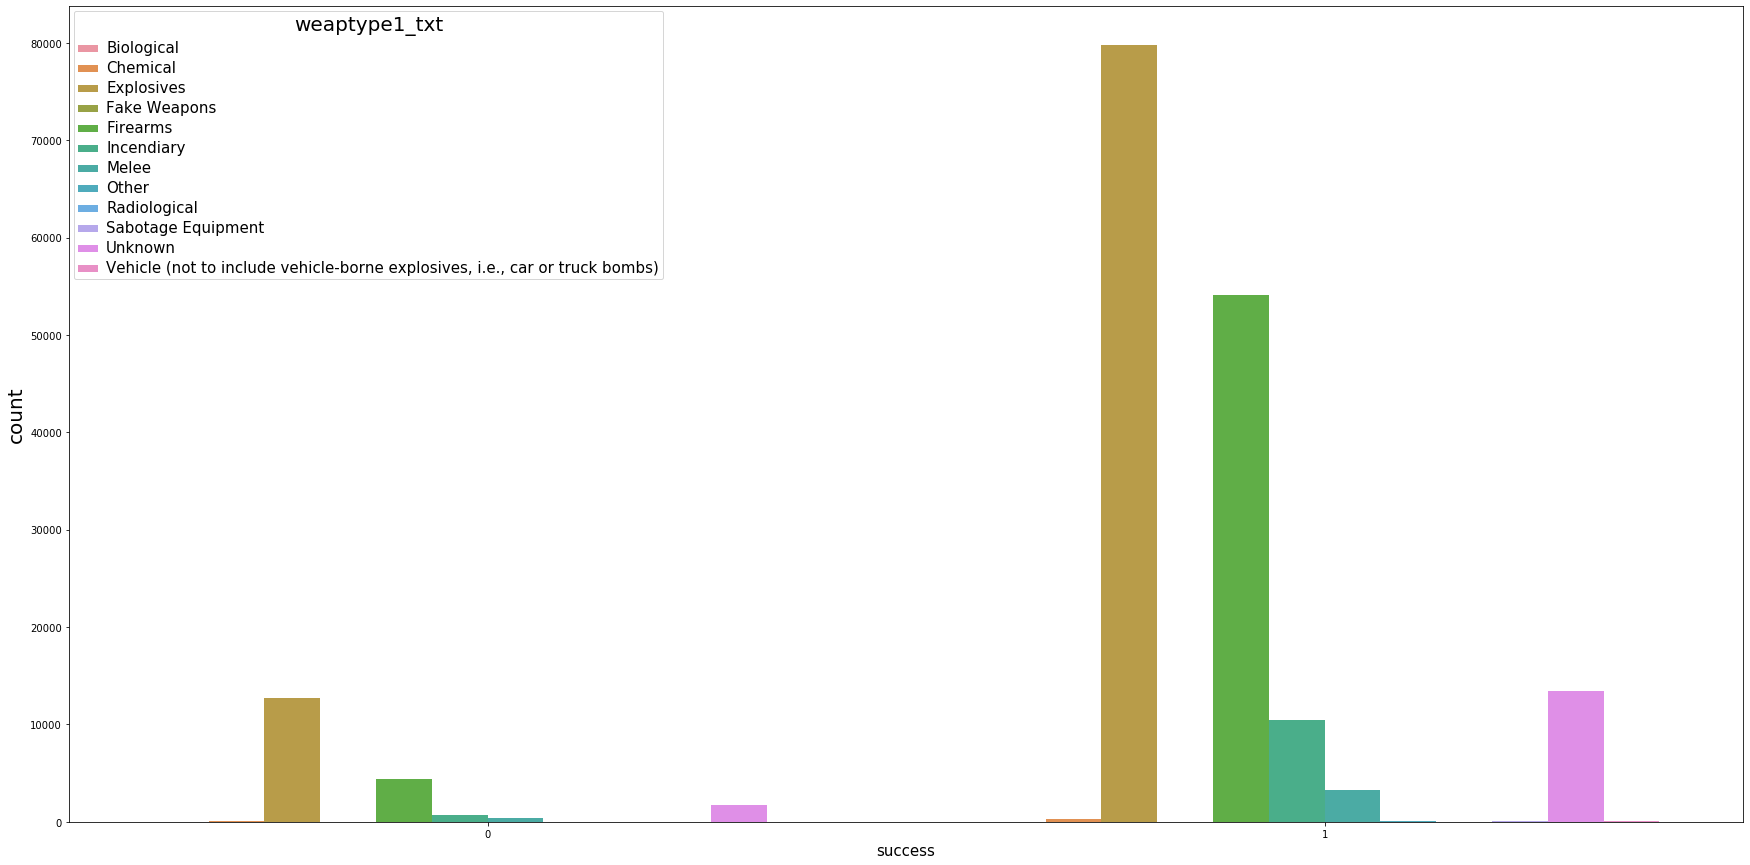

In [26]:
#Checking out the ratio of total successful attacks depending upon the type of weapon used
plt.figure(figsize=(30,15))
ax1=sns.countplot(x='success',hue='weaptype1_txt',data=df)
plt.setp(ax1.get_legend().get_texts(), fontsize='20')  
  
# for legend title
plt.setp(ax1.get_legend().get_title(), fontsize='20')
#for x and y label
ax1.set_xlabel(ax1.get_xlabel(),fontsize=30)
ax1.set_ylabel(ax1.get_ylabel(),fontsize=30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

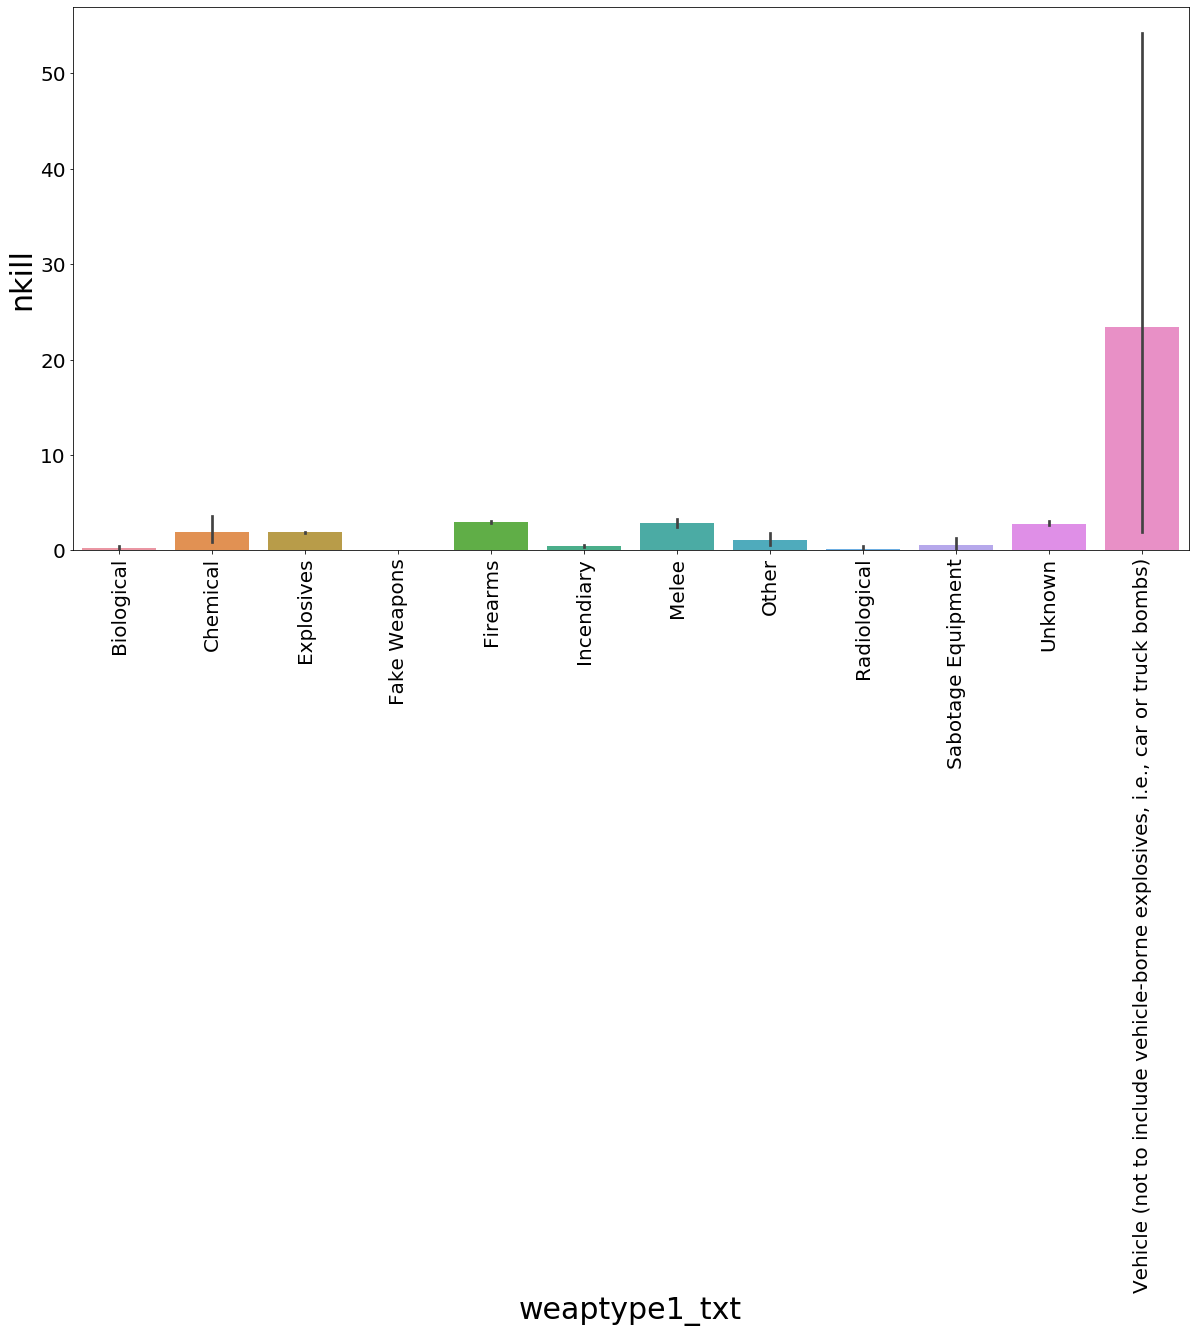

In [32]:
#To find out the type of waepon that lead to the maximum number of deaths/murder
plt.figure(figsize=(20,10))
d=sns.barplot(x='weaptype1_txt',y='nkill',data=df)
d.set_xlabel(d.get_xlabel(),fontsize=30)
d.set_ylabel(d.get_ylabel(),fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=90)

In [27]:
#To check the most attacked people and the country they belong
A=df['natlty1_txt'].value_counts().reset_index()
A.columns=['nationality','total_attacks']
A=A.head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

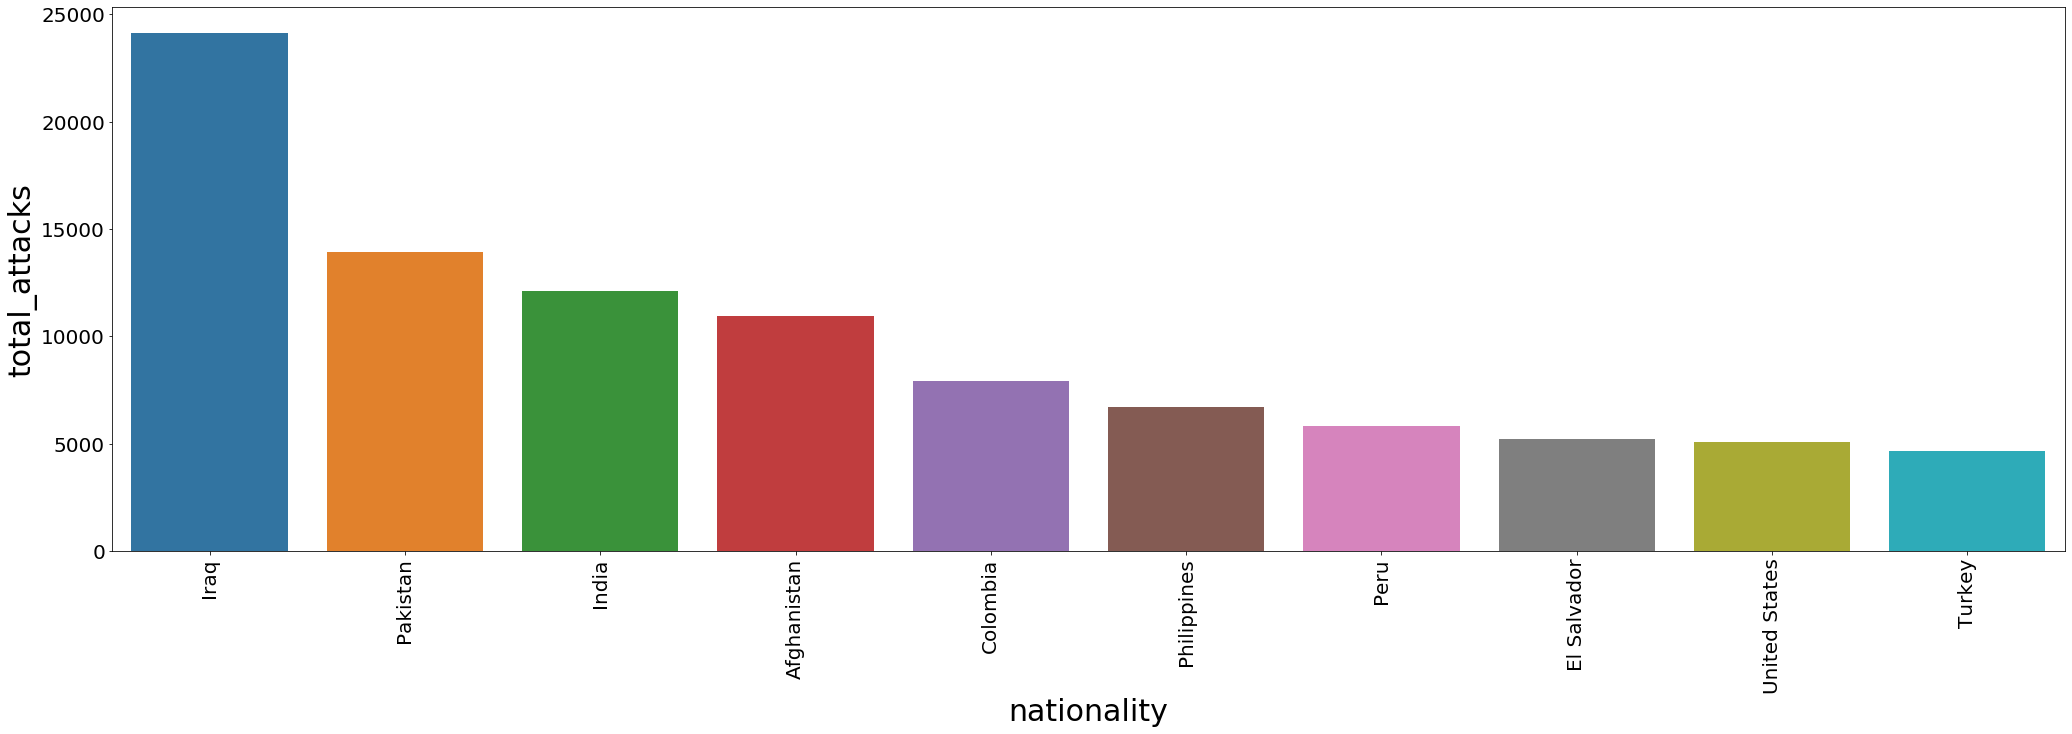

In [28]:
plt.figure(figsize=(35,10))
ax2=sns.barplot(x='nationality',y='total_attacks',data=A)
#for x and y label
ax2.set_xlabel(ax2.get_xlabel(),fontsize=30)
ax2.set_ylabel(ax2.get_ylabel(),fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=90)


Text(0, 0.5, 'count')

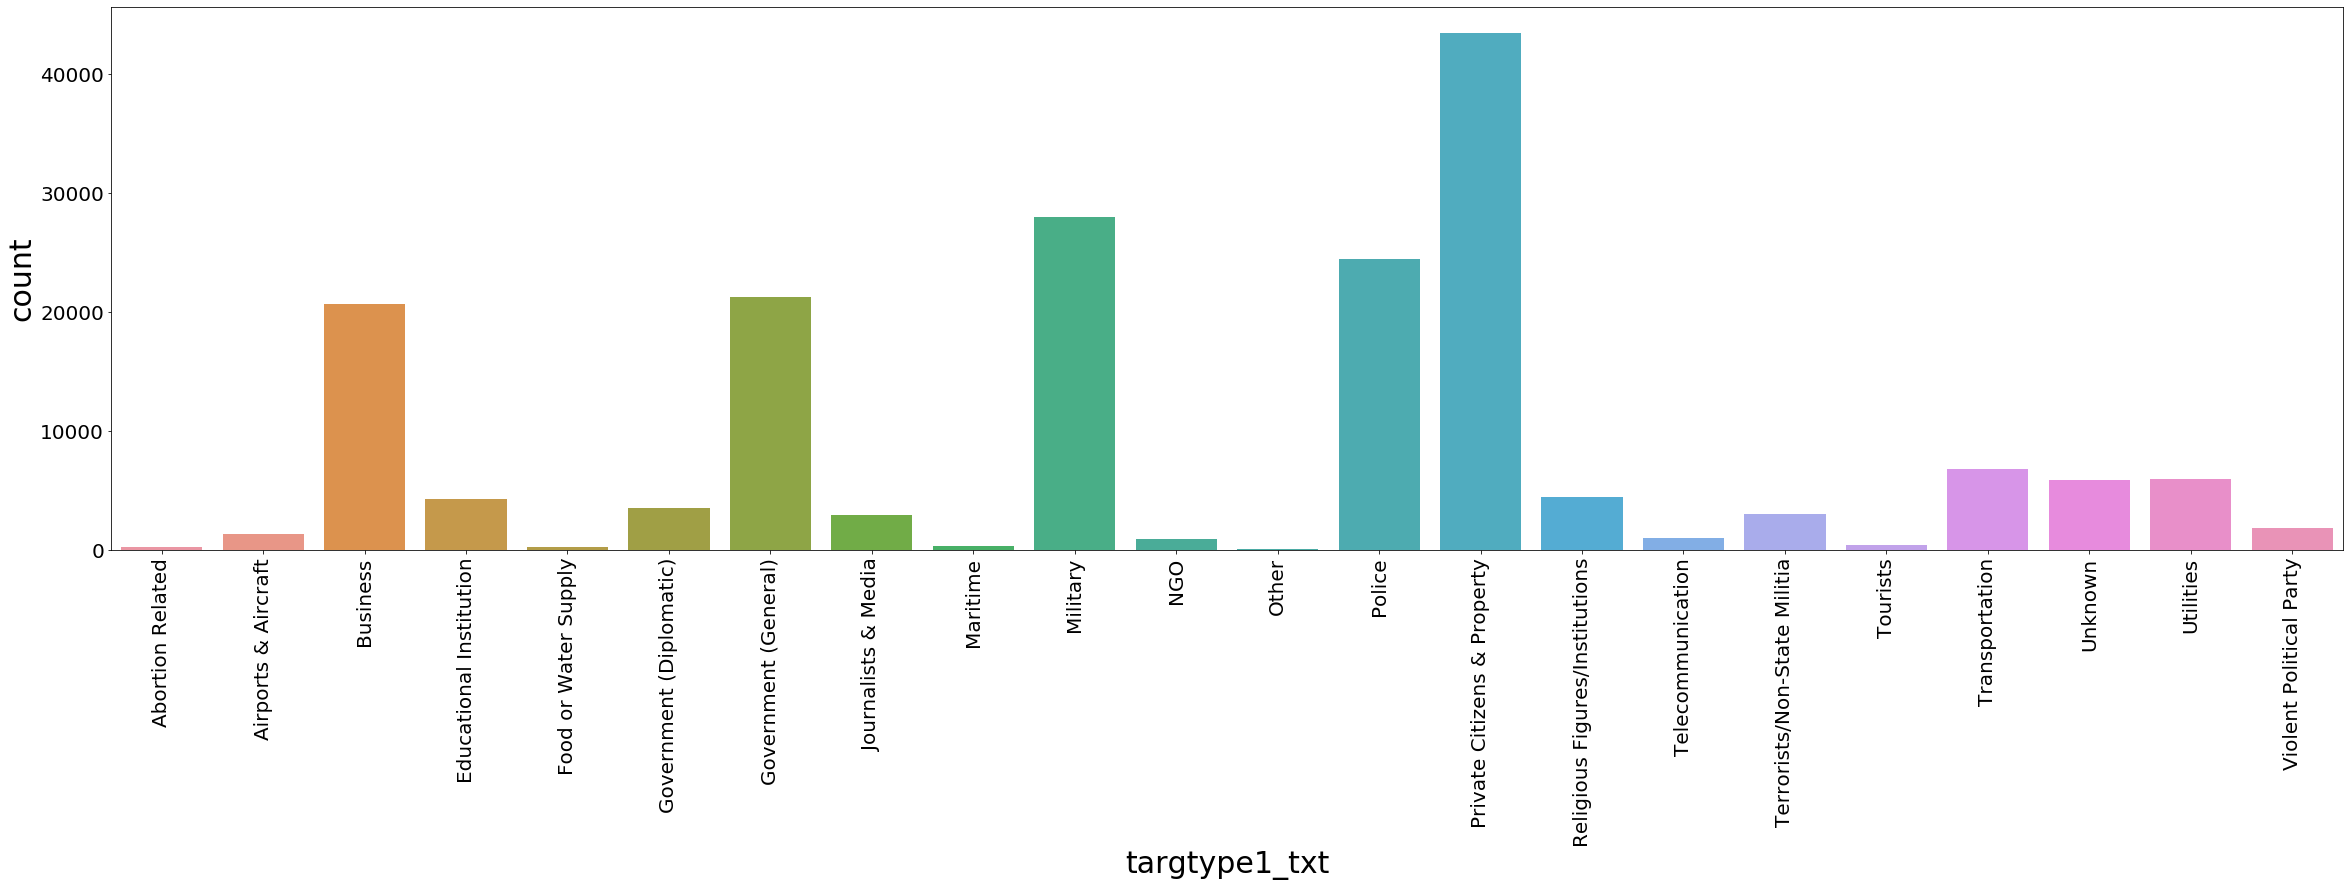

In [35]:
#To check the type of personnel targetted the most over the years
plt.figure(figsize=(40,10))
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
ax4=sns.countplot(x='targtype1_txt',data=df)
ax4.set_xlabel(ax4.get_xlabel(),fontsize=30)
ax4.set_ylabel(ax4.get_ylabel(),fontsize=30)


In [29]:
#To check the group which attacked the most over the years
B=df['gname'].value_counts().reset_index()
B.columns=['group name','total_attacks']
B=B.head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

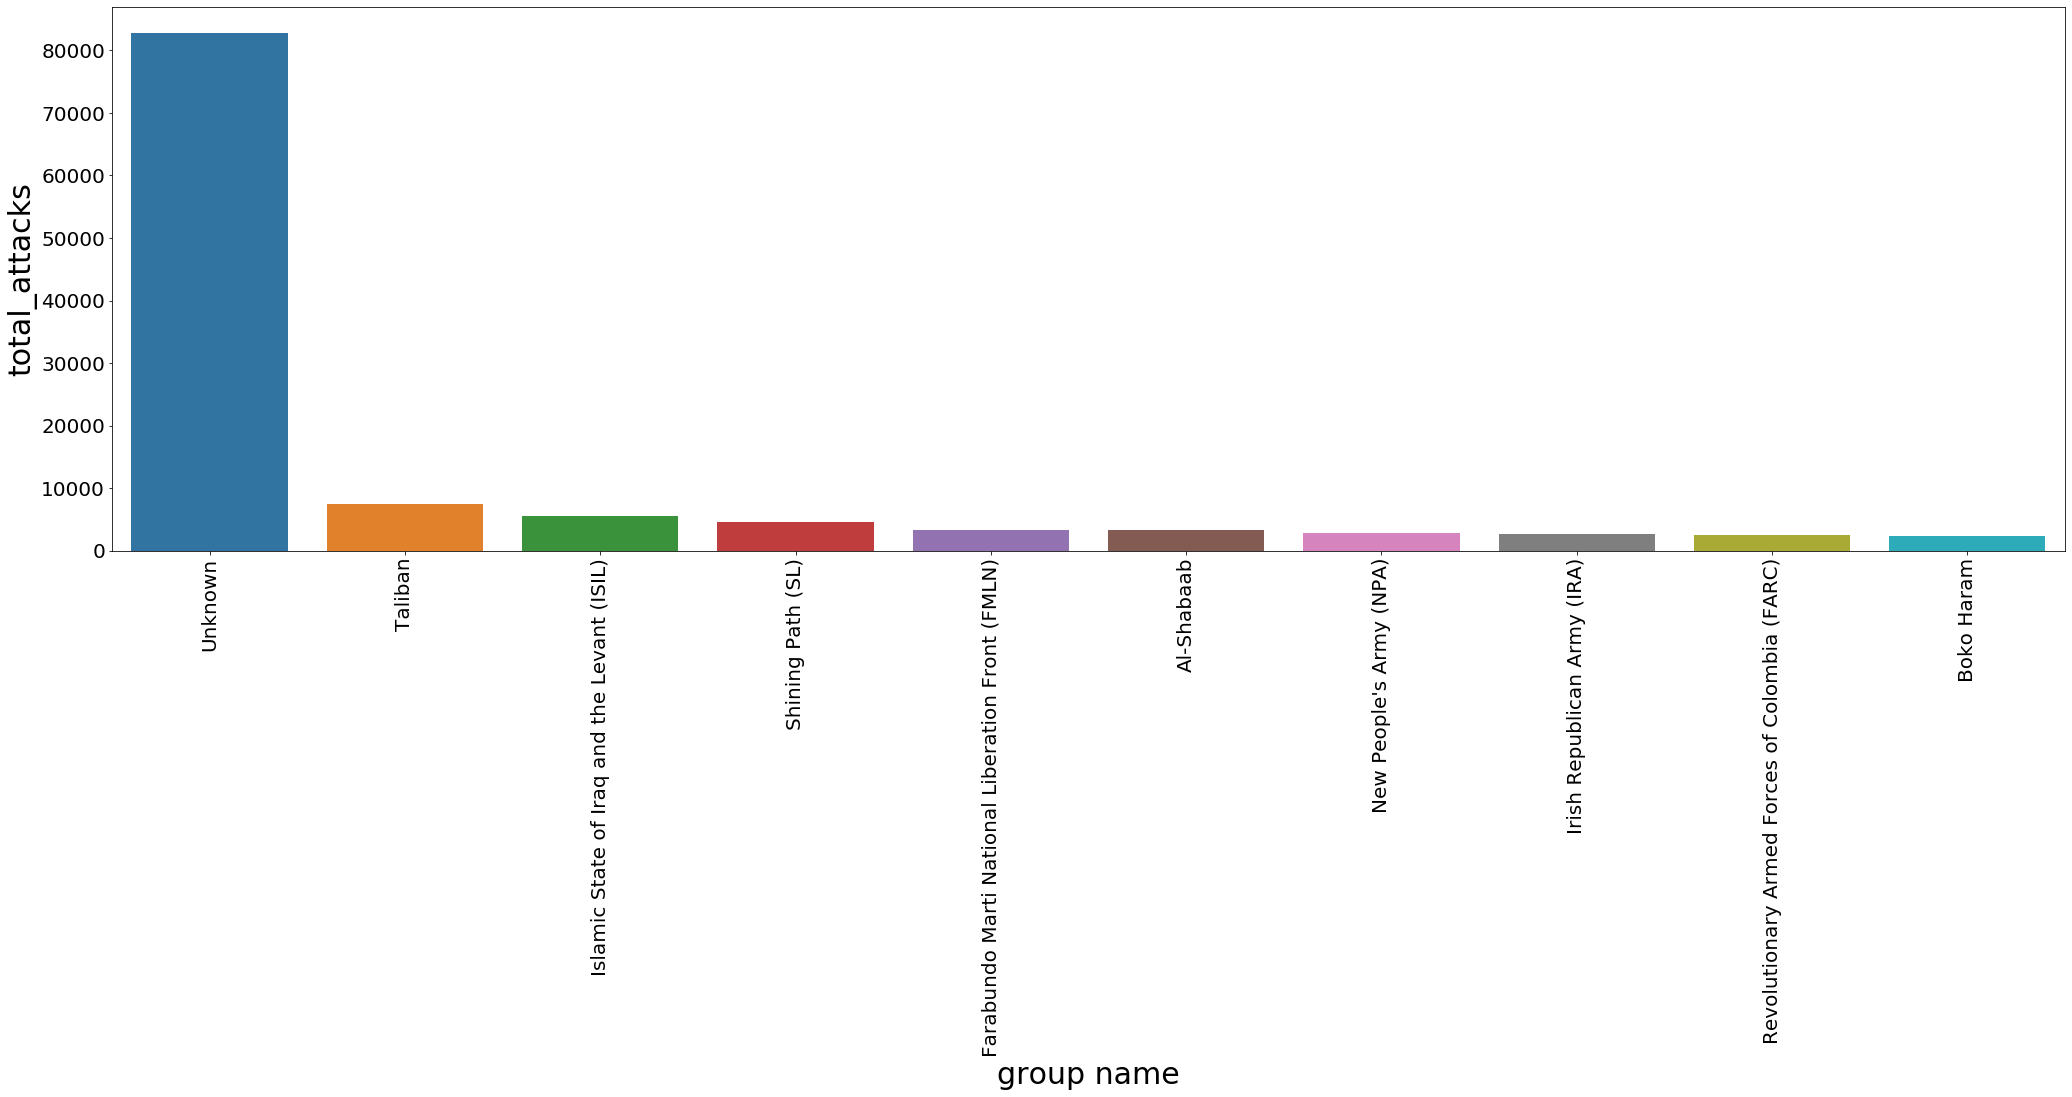

In [30]:
plt.figure(figsize=(35,10))
ax3=sns.barplot(x='group name',y='total_attacks',data=B)
#for x and y label
ax3.set_xlabel(ax3.get_xlabel(),fontsize=30)
ax3.set_ylabel(ax3.get_ylabel(),fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=90)


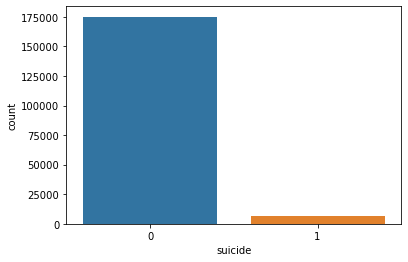

In [33]:
#To check the number of successful suicide attacks over the years
sns.countplot(x='suicide',data=df)

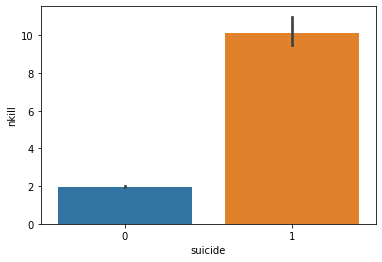

In [34]:
#To check the number of suicide attacks leading to number of kills 
sns.barplot(x='suicide',y='nkill',data=df)

## Conclusion
- Successful terrorist attacks saw hight peak around 2010. There does not seem any strong linear relationship between these two factors and attacks seem  to be more random in nature, revealing peaks in between. Yet there is a sharp decrease in number of attacks after attaining highest peat in around 2010. Either there is unavailability of data or attacks are more under control.
- Over the years, there number of kills are steadily increasing with random high peaks in between. But as we saw above, number of attacks are decreasing yet there is an increase in number of kills. This indicates that the number of attacks are less, more planned and more violent in nature.
- Bombing/Explosion is the highest used mode of attacks all through the history. Followed by Armed assault, assasination,Hostage and Infrastructure attacks.
- Bombing/Explosion and armed assault are the most successful mode of attacks used over the years. Bombing are most widely used and hence has more number of failure cases. Yet its success to failure ratio is vary high. While in case of asssination attacks, the seem to have more failure rates. While, even if hostage attacks are not as much used as explosions, their failure rate is minimal.
- Hijacking and Hostage taking mode of attacks are the most violent ones. 
- Explosives and firearms are the most used weapons in all the sucessful attacks till now.
- Vehicles are the most violent mode of attacks. This is inline with our finding of case of Hijacking.
- People of Iraq, Pakistan, India and Afghanistan are most likely to be the victims of terrorist attacks
- Primary target of terrorists is Private citizens and property.
- Either the attacks remain unclaimed or Because of too many missing data values, most active group could not be concluded for sure. According to the data, all the groups seem to be responsible for almost the same amount of claim.
- Number of successful suicide attacks are less in number.
- Casualties in case of successful suicide attack is really considerable. 